# Red Wine Quality Prediction

## Problem Statement:
The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.


In [1]:
# importing necessary libraries and as it's classification problem we'll select some clissifier  technique
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
# classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,auc,classification_report,confusion_matrix,f1_score,roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [5]:
# importing dataset
df=pd.read_csv(r"C:\Users\hp\Dropbox\PC\Desktop\Data trained\Red Wine Quality Prediction\winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
# checking stats
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Understanding Features
FIXED ACID - This is a total of most acids involved with wine or fixed or nonvolatile. It resembles a bell shaped, normal distribution graph.the maximum count goes somewhat around 7.5.

VOLATILE ACID - This attribute gives the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste. The graph resembles the bell shaped , like a normal dirstibution. Majority of wines have values between [0.3, 0.72].

CITRIC ACID - Found in small quantities, citric acid can add ‘freshness’ and flavor to wines. There are two peaks appearing in the graph, one near 0.02 and other near 0.25.

RESIDUAL SUGAR - It is the amount of sugar remaining after fermentation stops. The graph for residual sugar is positively i.e left skewed. Majority of wines have lower than 2.5 residual sugar value.

CHLORIDES - Chlorides gives the amount of salt in the wine. Most of the wines have lesser than 0.2 chloride value.

FREE SO2 - Free sulfur dioxide prevents microbial growth and the oxidation of wine. Most of the wines have lesser than 20 free SO2 value.

TOTAL SO2 -Represents the amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 mg/L, SO2 becomes evident in the nose and taste of wine. The graph appears to be left skewed and most of the wines have lesser than 50 total SO2 value.

DENSITY - Density plot looks normally distributed, with mean eqals to 0.9967 and median equals to 0.9968.

pH - This attribute describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic), where 7 is neutral.The graph appears to be quiet normally distributed. Most of the wines have a pH level ranging between [3.2, 3.4].

SULPHATE - This is a wine additive which can contribute to sulfur dioxide gas (S02) levels and acts as an antimicrobial and antioxidant. It also resembles a bell shaped graph with maximum wines having around 6.5 sulphates value.

ALCOHOL CONTENT - The graph of alcohol content appears to be positively i.e left skewed and most of them are below 11% mark.

In [7]:
# we see there is no null values 
# describe dont show object data type but isnull help us in that
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
# Here we are sure there is no null values
# now we'll check unique keys in our target i.e quality column
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [9]:
# checking unique key for alcohol too
df['alcohol'].unique()

array([ 9.4       ,  9.8       , 10.        ,  9.5       , 10.5       ,
        9.2       ,  9.9       ,  9.1       ,  9.3       ,  9.        ,
        9.7       , 10.1       , 10.6       ,  9.6       , 10.8       ,
       10.3       , 13.1       , 10.2       , 10.9       , 10.7       ,
       12.9       , 10.4       , 13.        , 14.        , 11.5       ,
       11.4       , 12.4       , 11.        , 12.2       , 12.8       ,
       12.6       , 12.5       , 11.7       , 11.3       , 12.3       ,
       12.        , 11.9       , 11.8       ,  8.7       , 13.3       ,
       11.2       , 11.6       , 11.1       , 13.4       , 12.1       ,
        8.4       , 12.7       , 14.9       , 13.2       , 13.6       ,
       13.5       , 10.03333333,  9.55      ,  8.5       , 11.06666667,
        9.56666667, 10.55      ,  8.8       , 13.56666667, 11.95      ,
        9.95      ,  9.23333333,  9.25      ,  9.05      , 10.75      ])

In [10]:
# checking value counts in target(quality) columns
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [11]:
# as we can see the value count
# now well consider 'quality'>=7 as good quality of wine and rest of it as poor ones
df['quality']=df['quality'].replace([7,8],1)
df['quality']=df['quality'].replace([3,4,5,6],0)

In [12]:
df['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [14]:
# As we have divided the whole data into 0(poor quality) and 1(good quality)
# But we can see this data become imbalance 
#so,we have to balance the data using upsampling technique,since we have limited data and we can't loose any because it may effect our model
#we'll deal with it later first we should see the distribution

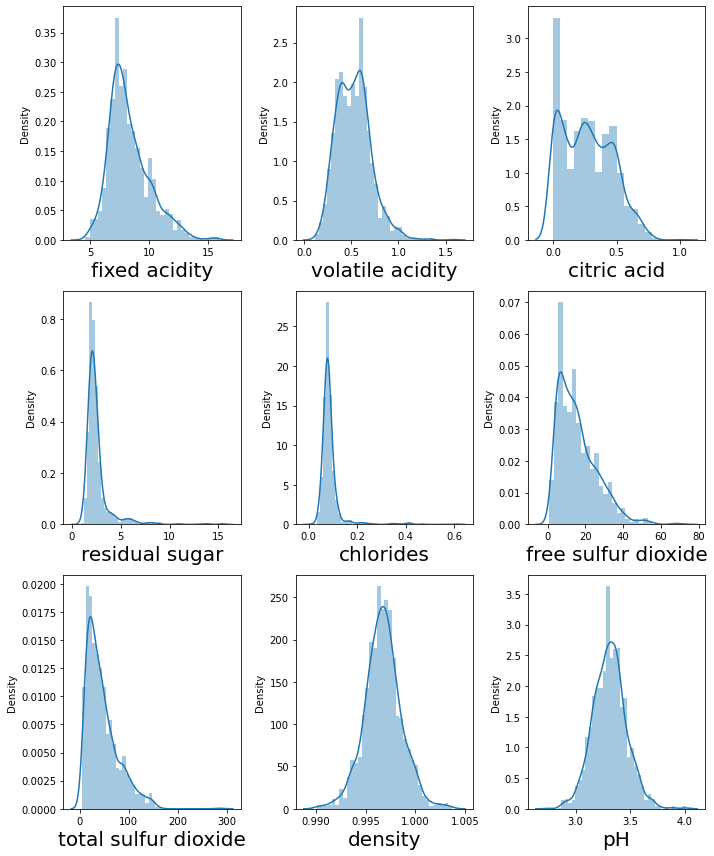

In [15]:
#lets plot to see data distribution


plt.figure(figsize=(10,12),facecolor='white')
plotnumber = 1


for column in df:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

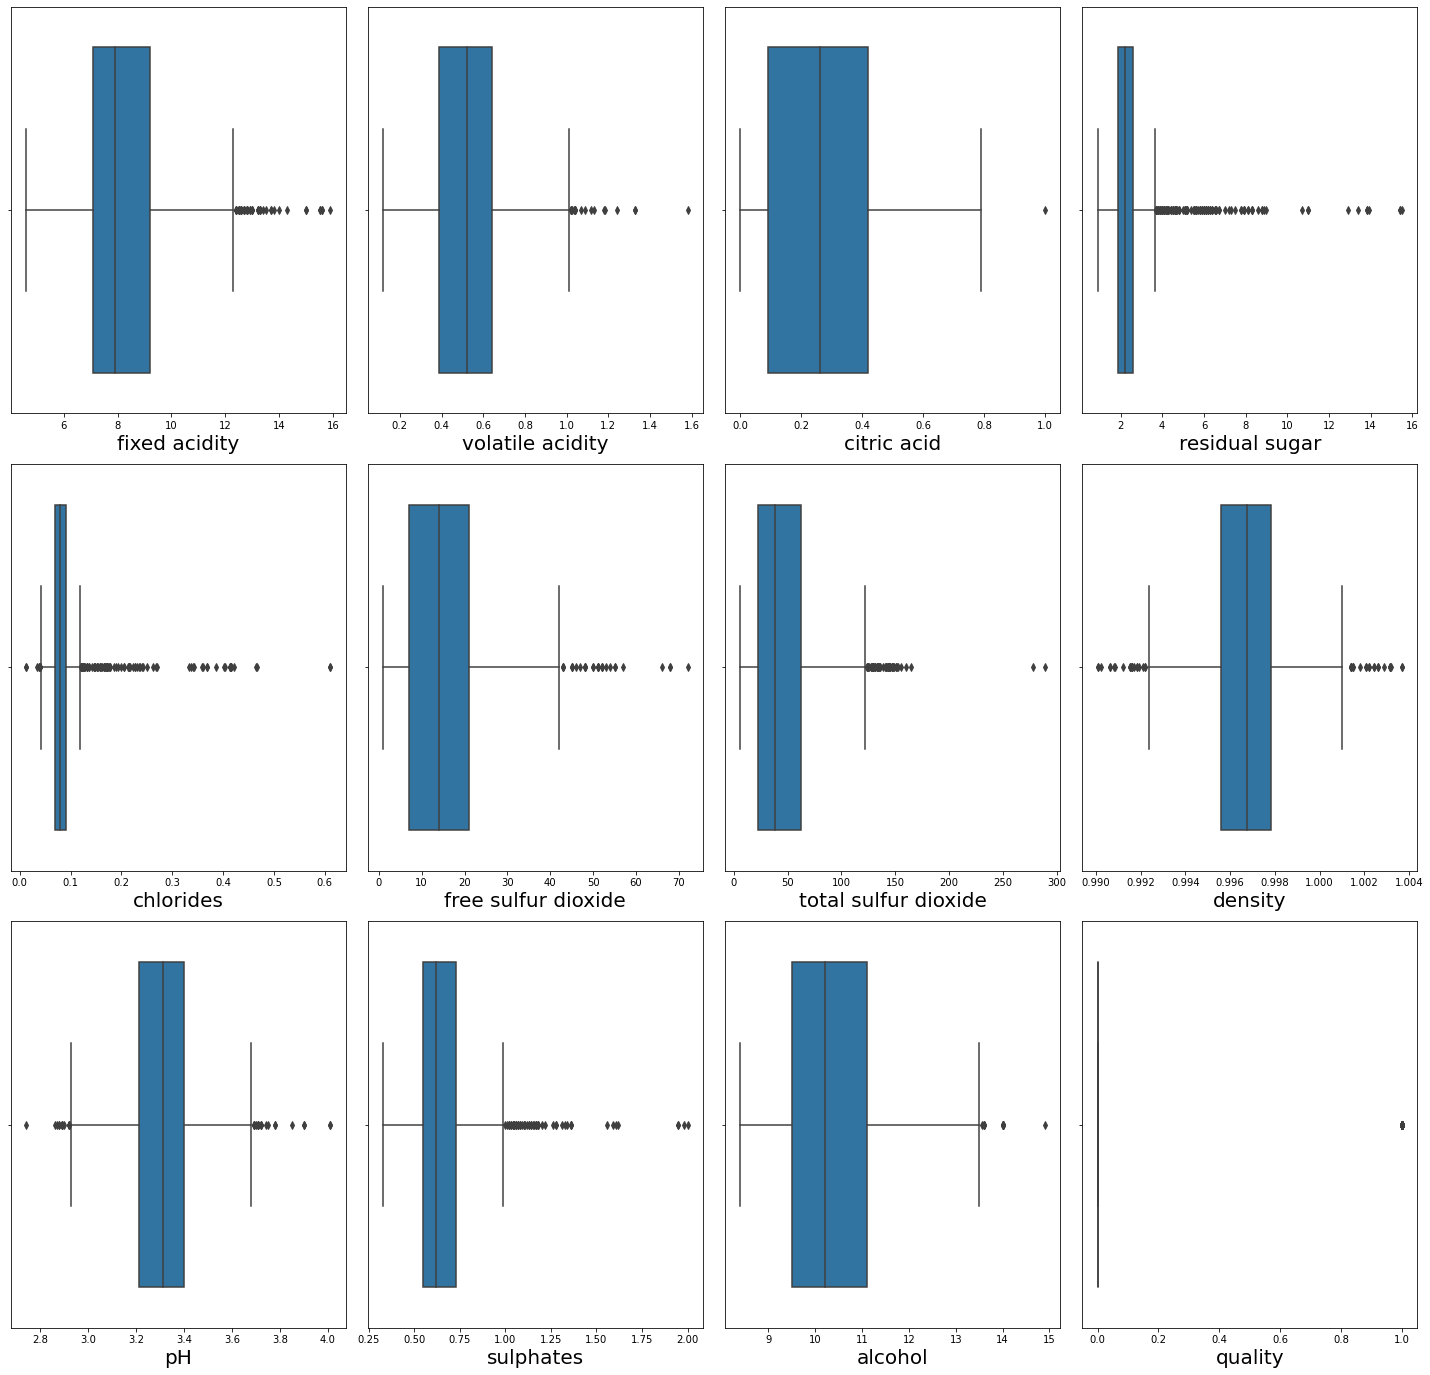

In [16]:
#Checking Outliers using boxplot, since data seemrd skeweed


plt.figure(figsize=(20,25))

plotnumber=1

for column in df:
    if plotnumber<=16 : 
        ax=plt.subplot(4,4,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column , fontsize=20)
        
    plotnumber+=1
plt.tight_layout()


In [17]:
#Removing Outliers using quantile method

q = df['fixed acidity'].quantile(0.95)
data_cleaned=df[df['fixed acidity']<q]
q=data_cleaned['volatile acidity'].quantile(0.97)
data_cleaned=data_cleaned[data_cleaned['volatile acidity']<q]
q=data_cleaned['citric acid'].quantile(0.99)
data_cleaned=data_cleaned[data_cleaned['citric acid']<q]
q=data_cleaned['residual sugar'].quantile(0.95)
data_cleaned=data_cleaned[data_cleaned['residual sugar']<q]
q=data_cleaned['chlorides'].quantile(0.95)
data_cleaned=data_cleaned[data_cleaned['chlorides']<q]
q=data_cleaned['free sulfur dioxide'].quantile(0.97)
data_cleaned=data_cleaned[data_cleaned['free sulfur dioxide']<q]
q=data_cleaned['total sulfur dioxide'].quantile(0.97)
data_cleaned=data_cleaned[data_cleaned['total sulfur dioxide']<q]
q=data_cleaned['density'].quantile(0.98)
data_cleaned=data_cleaned[data_cleaned['density']<q]
q=data_cleaned['pH'].quantile(0.99)
data_cleaned=data_cleaned[data_cleaned['pH']<q]
q=data_cleaned['sulphates'].quantile(0.98)
data_cleaned=data_cleaned[data_cleaned['sulphates']<q]
q=data_cleaned['alcohol'].quantile(0.99)
data_cleaned=data_cleaned[data_cleaned['alcohol']<q]

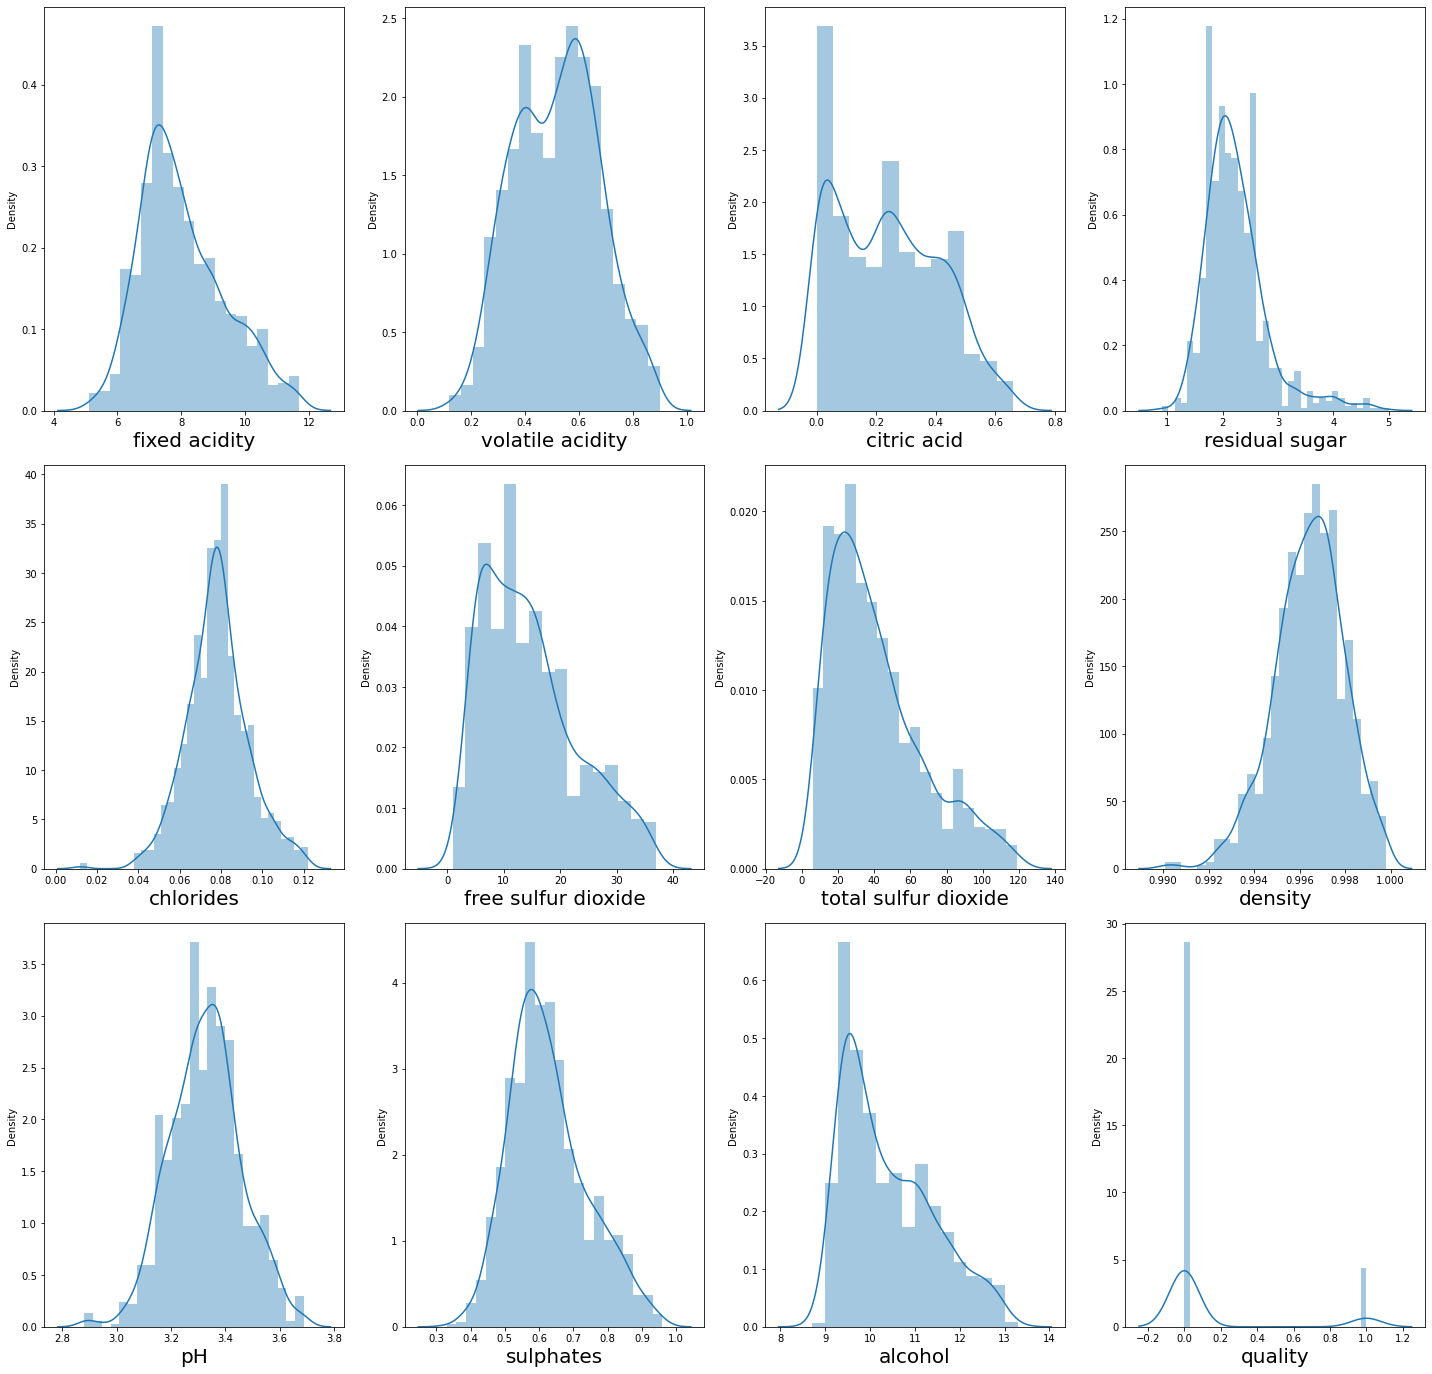

In [18]:
#Let's see after removing outliers how data is distributed
plt.figure(figsize=(20,25))

plotnumber=1

for column in data_cleaned:
    if plotnumber<=16 : 
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(data_cleaned[column])
        plt.xlabel(column , fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

In [19]:
df=data_cleaned

In [20]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,0
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


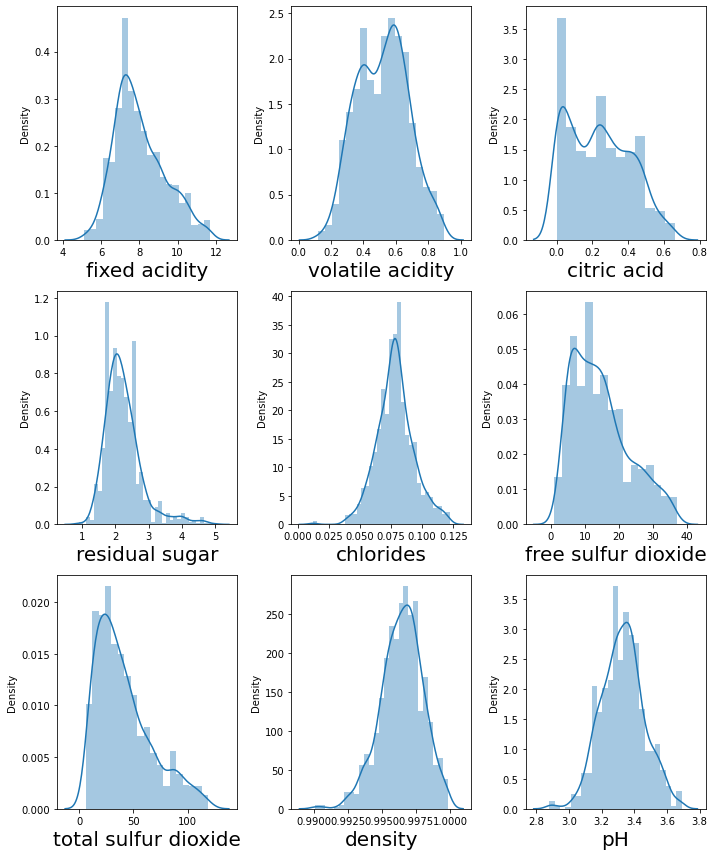

In [21]:
#lets plot to see data distribution


plt.figure(figsize=(10,12),facecolor='white')
plotnumber = 1


for column in df:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

In [22]:
# we'll select best feature that contributes to the quality of wine
# using select k best
#(select kbest use f_classif function to find best features where f_classif uses anova)
from sklearn.feature_selection import f_classif,SelectKBest


In [23]:
# seperating our dataset into features and labels
x=df.drop('quality',axis=1)
y=df.quality

In [24]:
#score_func is one of the parameter
best_features= SelectKBest(score_func=f_classif,k=8)

In [25]:
fit=best_features.fit(x,y)
df_scores=pd.DataFrame(fit.scores_)
df_columns=pd.DataFrame(x.columns)

In [26]:
# concatinating all of them
feature_scores=pd.concat([df_columns,df_scores],axis=1)
feature_scores.columns=('feature_Name','score')
print(feature_scores.nlargest(8,'score'))

            feature_Name       score
10               alcohol  264.717460
9              sulphates  132.490281
1       volatile acidity   94.651113
2            citric acid   74.214905
7                density   55.373968
6   total sulfur dioxide   31.517908
4              chlorides   28.768075
0          fixed acidity   22.064081


In [27]:
new_x=df[[ 'alcohol','volatile acidity','citric acid','sulphates','density','total sulfur dioxide','fixed acidity','chlorides' ]]

In [28]:
new_x.head()

,alcohol,volatile acidity,citric acid,sulphates,density,total sulfur dioxide,fixed acidity,chlorides
0,9.4,0.70,0.00,0.56,0.9978,34.0,7.4,0.076
1,9.8,0.88,0.00,0.68,0.9968,67.0,7.8,0.098
2,9.8,0.76,0.04,0.65,0.9970,54.0,7.8,0.092
3,9.8,0.28,0.56,0.58,0.9980,60.0,11.2,0.075
4,9.4,0.70,0.00,0.56,0.9978,34.0,7.4,0.076


In [29]:
x=new_x

In [30]:
x

,alcohol,volatile acidity,citric acid,sulphates,density,total sulfur dioxide,fixed acidity,chlorides
0,9.4,0.700,0.00,0.56,0.99780,34.0,7.4,0.076
1,9.8,0.880,0.00,0.68,0.99680,67.0,7.8,0.098
2,9.8,0.760,0.04,0.65,0.99700,54.0,7.8,0.092
3,9.8,0.280,0.56,0.58,0.99800,60.0,11.2,0.075
4,9.4,0.700,0.00,0.56,0.99780,34.0,7.4,0.076
...,...,...,...,...,...,...,...,...
1593,9.5,0.620,0.08,0.82,0.99651,38.0,6.8,0.068
1594,10.5,0.600,0.08,0.58,0.99490,44.0,6.2,0.090
1596,11.0,0.510,0.13,0.75,0.99574,40.0,6.3,0.076
1597,10.2,0.645,0.12,0.71,0.99547,44.0,5.9,0.075


In [31]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1593    0
1594    0
1596    0
1597    0
1598    0
Name: quality, Length: 1148, dtype: int64

In [32]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(x)
X_scaled

array([[-0.99464374,  1.15164726, -1.37190486, ..., -0.28328486,
        -0.47774228, -0.15500155],
       [-0.59739757,  2.2973895 , -1.37190486, ...,  0.99921557,
        -0.17481594,  1.31669737],
       [-0.59739757,  1.53356134, -1.14184288, ...,  0.49398813,
        -0.17481594,  0.91532494],
       ...,
       [ 0.59434094, -0.05774732, -0.62420343, ..., -0.05010296,
        -1.31078972, -0.15500155],
       [-0.2001514 ,  0.80155936, -0.68171893, ...,  0.10535164,
        -1.61371606, -0.22189695],
       [ 0.59434094, -1.33079424,  1.33132337, ...,  0.02762434,
        -1.53798447, -0.7570602 ]])

In [33]:
#Checking Multicollinearity

vif = pd.DataFrame()
vif['vif']=[variance_inflation_factor(X_scaled,i) for i in range (X_scaled.shape[1])]
vif["Features"] = x.columns
vif

,vif,Features
0,2.234367,alcohol
1,2.067449,volatile acidity
2,2.958066,citric acid
3,1.262677,sulphates
4,3.172541,density
5,1.127541,total sulfur dioxide
6,2.526416,fixed acidity
7,1.255526,chlorides


In [34]:
# no collinearity found


## Model building

In [35]:
#splitting the data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=50)

#### Data Balancing

In [55]:
## Balancing the data set using smote
from collections import Counter
Counter(y_train)
# this is imbalance data set
import six
import joblib
import sys
sys.modules['sklearn.externals.six']=six
sys.modules['sklearn.externals.joblib']=joblib
!pip install -U imbalanced-learn

In [40]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(0.75)
x_train_ns,y_train_ns=sm.fit_resample(x_train,y_train)

In [41]:
from collections import Counter
print('before{}'.format(Counter(y_train)))
print('after{}'.format(Counter(y_train_ns)))

beforeCounter({0: 698, 1: 105})
afterCounter({0: 698, 1: 523})


In [42]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [43]:
# reinstantiating model
lr=LogisticRegression()
dt=DecisionTreeClassifier()
knn=KNeighborsClassifier()
rf=RandomForestClassifier()

In [45]:
lr.fit(x_train_ns,y_train_ns)


LogisticRegression()

In [46]:
dt.fit(x_train_ns,y_train_ns)


DecisionTreeClassifier()

In [47]:
knn.fit(x_train_ns,y_train_ns)

KNeighborsClassifier()

In [48]:

rf.fit(x_train_ns,y_train_ns)

RandomForestClassifier()

In [49]:
rf.score(x_test,y_test)

0.9014492753623189

In [50]:
dt.score(x_test,y_test)

0.8463768115942029

In [51]:
knn.score(x_test,y_test)

0.7768115942028986

In [52]:
lr.score(x_test,y_test)

0.8347826086956521

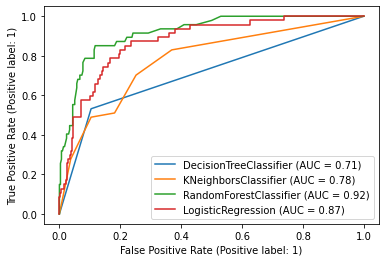

In [53]:
#ploting roc auc
from sklearn.metrics import plot_roc_curve
disp=plot_roc_curve(dt,x_test,y_test)

plot_roc_curve(knn,x_test,y_test,ax=disp.ax_)

plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)

plot_roc_curve(lr,x_test,y_test,ax=disp.ax_)

plt.show()

as we can see random forest works best for this model we'll use random forest

In [54]:
# well do hyper parameter tuning to increase its score
# now we'll tune our data with gridsearchCV
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=41)
clf=RandomForestClassifier()
params={'n_estimators':[12,13,14,15],'criterion':['entropy','gini'],'min_samples_split':[8,9,10],'min_samples_leaf':[4,5,6.7]}
grd=GridSearchCV(clf,param_grid=params)
grd.fit(x_train,y_train)
print('best_parameter:-',grd.best_params_)
clf=grd.best_estimator_                  ## reinstentiate with best parameter
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
rf_conf_mat=confusion_matrix(y_test,y_pred)
rf_conf_mat
accuracy=accuracy_score(y_test,y_pred)
accuracy

best_parameter:- {'criterion': 'entropy', 'min_samples_leaf': 4, 'min_samples_split': 9, 'n_estimators': 15}


0.9188405797101449

### Hence Rndom Forest works best and gives best accuracy